# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [119]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from numpy import percentile
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import array
import matplotlib.pyplot as plt
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [120]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [121]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0,30,400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,18815,3610,11107,1148,2134,2963
2,4446,906,1238,3576,153,1014


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

"It is important that you justify your insights about each customer with a comparison of each product volume between the sample customer and the mean or medians or quartiles of the population. That will also give you another perspective about the data."

Udacity Review

**Answer:**

Sample Customer # 0 : This customer is making much of its money on *Fresh*, *Milk* and *Grocery*'s goods. Since *Fresh* and *Grocery* are near their average, we're expecting a small grocery-like shop. Since *Milk* is up the average from 52% of STD means it's still a fairly small shop but we know it's making more than the average money on *Milk* which from experience seems to point out a **convenience store**.

Sample Customer # 1 : Alike the 1st customer, this one is making mush of its money on *Fresh*, *Milk* and *Grocery*'s goods. Now, both *Fresh* and *Grocery* are above their mean from respectivly 53% and 33% making this shop a slightliest bigger one than the 1st while still resembling its properties. We point out *Milk* being under mean from 30% of STD but exactly on median. This shows the very fewer relative money this customer's making on this feature and proposing a **grocery** instead of a convenience store.

Sample Customer # 2 : Unlike the 2 other customers, this one is really under of the expanditures mean for all of the features and even under 1st quartile for both *Milk*, *Grocery* and *Detergents_Paper* showing how a small business it is. We understand that the lots of *Frozen*s (on 3rd quartile) and relatively high *Delicatessen* expanditures (on mean but third importance in relative expense) may point a Bistro-Like business but for generalisation sake we'll say it's a **restaurant**.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [122]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', 1)

# TODO: Split the data into training and testing sets using the given feature as the target
# Choose 42 for shoutout to Hitchhiker Guide to the Galaxy
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size=.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print 'regressor score on test : ', score

regressor score on test :  0.68845488165


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature relevant for identifying a specific customer?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** 

I've attempt to predict the *Grocery* feature.

I've got an average prediction R^2 score of approximately 0.68. 

Since predicting *Grocery* using the other features get fairly good results, we know we don't need *Grocery* to identify customer since 68% of it's variance can be explaine by other features. Hence, 68% of its identity information  are contain within some (or all at some degree) of the other features. We wish we could identify relevant features in *Grocery*'s prediction in order to get rid of the *Grocery*'s axis by coliding it into another and thus reducing the dimensionality of the problem from 6 to 5.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

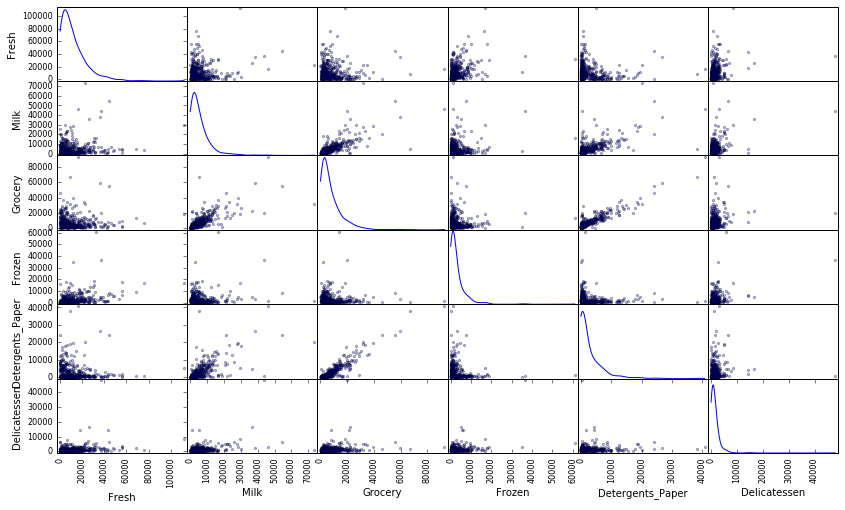

In [123]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** 

Yes, *Grocery* and *Detergents_paper* seems to be linearly proportional so their relative points lies around some kind of line. It's hard to looked up any other relations since datas are too skewed to eyeball it but *Milk* and *Grocery* seems to be somehow related to one another.

Those relations confirm my suspicions about *Grocery*'s irrelevance in predicting customer's specific buying habits. We could use *Detergents_Paper* to do so.

The points don't seems to be normally distributed, most of them are squeezed in bunch toward origin or axes. We may wish to normalize the data set in order to have a better look at relations.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

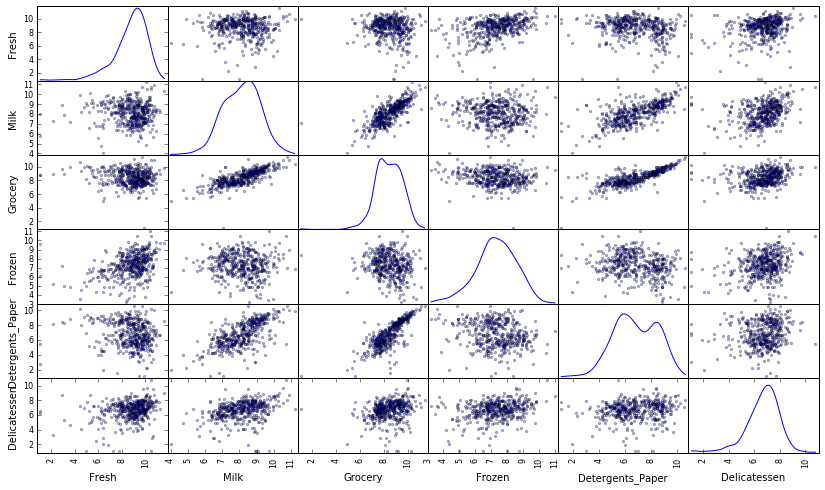

In [124]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [125]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,9.842410,8.191463,9.315331,7.045777,7.665753,7.993958
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


### Question 3 (2nd part)

"*Student further discusses the data distribution for those features.*"

https://review.udacity.com/#!/projects/5422789357/rubric

**Answer:**

Now that the relations are normalized, we can fully see Grocery-Detergents_Paper relation and confirm the Grocery-Milk one. We can extrapolate by talking about constant relation between Frozen and Delicatessen but for the scattered form of the data relation cloud, it would probably get a poor explained-variance score.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [134]:
# For each feature find the data points with extreme high or low values
# Create empty dictionnary for further use
d = {}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    temp1 = (log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]).index.tolist()
    
    # Create a dictionnary for all the feature outliers indexes list to stand 
    d["'{}'".format(feature)] = (log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]).index.tolist()
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [137]:
dummy_1=[]
dummy_3=[]
for key1 in d:
    dummy_1.append(key1)
    for i in d[key1]:
        if i in dummy_3: pass
        else:
            dummy_2 = []
            for key2 in d:
                if key2 in dummy_1: pass
                else:
                    if i in d[key2]:
                        dummy_2.append(key2)
            if dummy_2 != []:
                dummy_3.append(i)
                dummy_2.append(key1)
                print 'following features : {}'.format(dummy_2), 'share the outlier index value: {}'.format(i)

following features : ["'Fresh'", "'Delicatessen'"] share the outlier index value: 66
following features : ["'Fresh'", "'Delicatessen'"] share the outlier index value: 128
following features : ["'Milk'", "'Grocery'", "'Delicatessen'"] share the outlier index value: 154
following features : ["'Grocery'", "'Detergents_Paper'"] share the outlier index value: 75
following features : ["'Fresh'", "'Frozen'"] share the outlier index value: 65


In [ ]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [66,128,154,75,65]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** 

There's 5 points considered as extreme values (not misclassification) by more than one features. Since : *"extreme values provide no or wrong information"* (1), we most get rid of those 5 points because they're affecting more than one axis and will mislead the direction of future PCs condensing relative features. 

(1) : https://www.bioconductor.org/packages/3.3/bioc/vignettes/pcaMethods/inst/doc/outliers.pdf

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. 

In the code block below, you will need to implement the following:
 - Import `sklearn.preprocessing.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

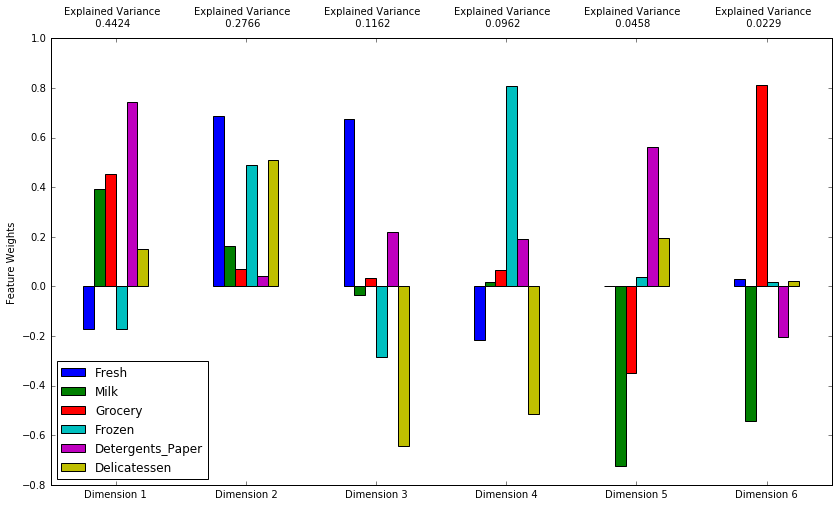

In [31]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
# I've imported the PCA using from sklearn.decomposition import PCA in order to fit .17 Sklearn version prerequisites
pca = PCA(n_components=6)
pca.fit(good_data)
# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_data)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** 

Explained variance for 1st and 2nd PC = .715 

Explained variance from 1st to 4th PC = .9314

Crushing all components on a line (1st graph) shows that this line will be mainly driven by Detergents_Paper, Grocery and Milk pc's directions and stand for nearly half of the explained variance (how those features move together).

Crashing it all on a plan (2nd graph), shows that the second pc's direction would be highly driven by Fresh, Delicatessen and Frozen.

Crashing it all in a space (3rd graph) places a new pc in Fresh direction and against Delicatessen directions.

Crashing it all down into an hyperspace of 4 dimensions (4th graph) will drive the newly added pc mainly in the Frozen direction and against the Delicatessen Direction. 

I just want to point out that all previous pcs are kept when a new pcs is added and that pc don't have to be at right angle from one another since there're not independant features.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [32]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7510,0.0705,0.9118,-1.7265,-0.2741,-0.3984
1,1.8004,0.8698,-0.2128,0.0079,-0.1188,-0.2314
2,1.8937,1.6766,-1.3189,-0.4852,0.3736,-0.3284
3,-1.1273,1.4580,-0.5247,0.4620,0.6799,0.6652
4,0.7967,2.4609,-0.4706,-0.2949,0.3016,0.0575
5,1.0838,0.3929,0.2417,-0.8931,-0.1939,-0.5362
6,1.1326,-0.2016,1.3001,-0.6000,0.4962,0.0956
7,1.5825,0.9682,-0.3626,-0.2521,0.4543,0.1350
8,0.8718,-0.5968,0.5109,-0.8300,0.1596,0.0341
9,2.8889,0.7411,-0.1143,-0.1801,0.0314,0.0822


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [33]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [34]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.8004,0.8698
1,3.0182,0.3952
2,-2.4819,-0.0446


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** 

K-Means Advantages: Very simple *(1)* . Very effective *(1)* . Works quite well on huge data sets *(2)* . Doesn't expect size for the clusters *(2)* .

K-Means Disadvantages : You have to specify the number of centroids (k) (1) . Very sensitive to outliers *(2)* . Get stuck in local minima, needs to be reset several times *(2)* . Need to hard classifiy even the unsure points *(1)* . Assume hyperspheric-like shape for clusters *(2)*.

Gaussian Mixture Model Advantages : No need to purely defined points classification *(1)* . Natural thinking *(3)* . Robust on non-hyperspheric-like clusters, doesn't assume shape for the clusters *(4)* .

Gaussian Mixture Model Disadvantages : Need to calculate the EM which can be an heavy calculation *(4)* . Assume natural gaussian distribution *(1)* . Need to give the variance, so assume size for clusters *(1) (4)* .

Since we're performing an A/B test and need to sample in deterministic categories, we're interested in K-Means absolute classification. Plus, the clusters being globular, we don't need the robustness to non-spheroid shape of GMM. We know we're not in a natural distribution so assuming gaussian distribution is useless. Taking GMM for model will result in a heavier algorithm with lots of unused caracteristics like inference and density estimation. We better hold to simpler K-Means model which allow all wanted features while staying fast, efficient and easily understandable.

*(1)* : Udacity

*(2)* : http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

*(3)* : https://www.quora.com/In-laymans-terms-how-do-Gaussian-models-work

*(4)* : http://scikit-learn.org/stable/modules/mixture.html#gmm

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [35]:
# turn it into a function for further iterative uses
def clust(reduced_data, pca_samples, n):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n)

    # TODO: Predict the cluster for each data point
    preds = clusterer.fit_predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    return score

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

In [36]:
# get the silhouette_score for n_cluster from 2 to 339 by step of 2 in a list called x
# x = []
# for i in range(2,440,2):
#     print i
#     point = clust(reduced_data, pca_samples, i)
#     x.append(point)

# I've runned the previous code and hardcoded the result down there for correction's easyness
x = [0.4197106203086583, 0.33288161925846232, 0.35990176108146815, 0.35484659239687788, 0.35062344261038764, 0.34867632958085709, 0.36891050062061626, 0.35977533928372263, 0.34951781895027934, 0.3496976844393111, 0.33379045629501874, 0.33094858541478578, 0.34504964025291218, 0.3426180443430078, 0.34313158783997166, 0.34443849706327306, 0.35091732892867117, 0.35570657708333947, 0.36235119711170344, 0.36243575638524678, 0.36816143359998682, 0.37266913880000124, 0.36884435777562796, 0.37662169326006933, 0.37542445767071825, 0.37759376599314382, 0.38291974746925933, 0.37758287592820583, 0.3711906908830549, 0.3830563763425498, 0.38083717089470598, 0.38461003313453518, 0.39874130425431958, 0.39175052039899794, 0.38110930859832942, 0.39269783164688293, 0.3989613339354372, 0.39150852819943266, 0.39909655058609972, 0.40207703479901946, 0.39975471537595841, 0.39532303142562764, 0.41267571877456016, 0.39397509358812494, 0.40636919244225567, 0.41662040144311768, 0.40596558683979317, 0.40620710499890061, 0.39363288319674622, 0.40185076785798229, 0.4021211645717796, 0.41528510615160619, 0.38878648629021295, 0.41240602448850527, 0.42664929643651806, 0.41581069512388746, 0.42370318162275533, 0.41563838357485772, 0.4303609172632053, 0.41322340438530952, 0.42627779937258337, 0.4188738630310721, 0.43287179257480524, 0.4345600747935322, 0.42876308675217339, 0.42666485643992247, 0.43741287895627645, 0.43537563618040737, 0.43516654070718724, 0.43760282343177426, 0.43326339997533669, 0.44363808817171346, 0.44666366436830807, 0.43388523356698422, 0.45326600894935853, 0.45311961416377838, 0.46152857540169173, 0.46017773667935274, 0.45087609554970282, 0.45102496330228298, 0.45644776651292446, 0.46209054850748771, 0.48372853669135402, 0.46553155661959639, 0.47370089641698637, 0.47897419738106312, 0.48621147770949891, 0.48822415340779596, 0.49965086158996636, 0.47701610537299199, 0.49133009535169581, 0.50067202159148294, 0.50669070860061727, 0.5030656649086741, 0.51501794727686634, 0.51570902118938788, 0.51174551448360006, 0.51530756178128168, 0.52123927079946153, 0.51837482283858483, 0.53025454701117458, 0.53334206471177026, 0.53791627814950116, 0.53304966914413376, 0.54374796590946228, 0.54443942947503776, 0.54617748560162827, 0.54664762739051898, 0.5611138584454588, 0.55678989331164497, 0.55922036873570291, 0.57112628016991374, 0.57621099677499743, 0.55714944933474531, 0.57928270104644708, 0.58843503022280719, 0.59473120364224108, 0.57928344486779415, 0.59183034186526273, 0.59895334924717492, 0.60532717115920076, 0.6089907745988572, 0.60089461316529147, 0.61603701279655021, 0.61513461898003396, 0.6170636396958189, 0.62036922804299199, 0.63238336018977204, 0.62976110193267876, 0.62747705465515957, 0.63526689916107626, 0.64174111523405664, 0.64579337515579394, 0.66066954539206413, 0.64661490254506393, 0.66074195057362395, 0.66390915602369538, 0.66562984939236269, 0.66826260461312537, 0.65971208213870858, 0.66803428248439822, 0.68625783894566361, 0.6894680283632445, 0.68724354027421519, 0.69597037079517388, 0.70188507713987458, 0.71624568746964246, 0.71875255044455022, 0.70915428701964756, 0.71572777638489349, 0.72282107906618043, 0.71879999434641395, 0.72683220820933214, 0.73853557931063851, 0.74295383321180963, 0.74085525529400542, 0.74553570798045998, 0.74436649627489471, 0.74375907286261056, 0.765986953193737, 0.75830554220750779, 0.75540075699394071, 0.77227443441263166, 0.76815566112139055, 0.76423861956898631, 0.77732398606922382, 0.77487365362246552, 0.78563525089873332, 0.79516795458837886, 0.78826331510419201, 0.80170596133525474, 0.79658761654614496, 0.80765423085644028, 0.8061171377002424, 0.81571440617176838, 0.81599079072209146, 0.82458581662188857, 0.82658270560322855, 0.83359921615687904, 0.83851376151381074, 0.83431196941367158, 0.83674018440767306, 0.84856364584085575, 0.8590039876575456, 0.85974456689884571, 0.86555243372841373, 0.86838167208568418, 0.87137373264532203, 0.87537021051232933, 0.88431545965172642, 0.8909017770475427, 0.88955749702753983, 0.89741656199499109, 0.90391901304552802, 0.90686794366099288, 0.90847619872129981, 0.91323485652318936, 0.91984860422033965, 0.92457742364187379, 0.92864339856877975, 0.93467621259678046, 0.93826971075231957, 0.943917977298529, 0.94778503768671918, 0.95336642890297063, 0.95797701145473957, 0.96181738263163596, 0.96504723007963089, 0.96856233002457381, 0.97342430909644118, 0.97718719594489012, 0.98049547568547113, 0.98418398872467538, 0.9874594925871365, 0.990591522730912, 0.99403344591444676, 0.99578156125373496, 0.99755681938413465, 0.9989168184881454]

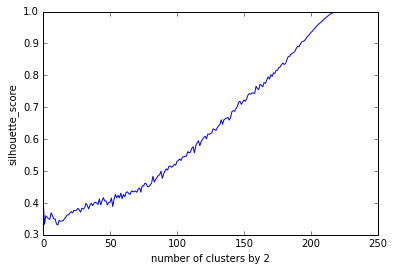

In [37]:
# Graph the x to see tendency
plt.plot(x)
plt.xlabel('number of clusters by 2')
plt.ylabel('silhouette_score')
plt.show()

**Answer:**

2 : 0.419166083203

3 : 0.392358689958

4 : 0.329829235658 

5 : 0.350068590169 

6 : 0.352239832411 

439 : 0.999721886765

We see that for numbers of clusters less than numbers of features (6) , 2 clusters seems the most appropriate with the biggest silhouette score. We also point out that for cluster bigger than ~15, the tendency is going up, since this tendecy tend to continue regularly to 440 clusters, we tend to think that this is due to overfitting and stick with n_clusters = 2.

In [38]:
# Apply out-of-function code to define useful global variables

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2)

# TODO: Predict the cluster for each data point
preds = clusterer.fit_predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

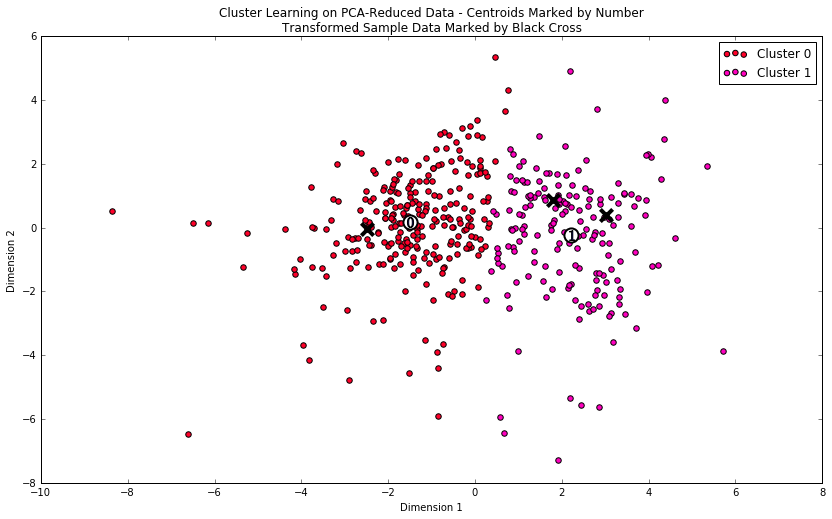

In [39]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [40]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8994.0,1909.0,2366.0,2081.0,290.0,681.0
Segment 1,3570.0,7749.0,12463.0,900.0,4567.0,966.0


In [161]:
# want to display(something.describe) for both cluster associated point
# 1st take out the outliers in the non-log data
good_non_log_data = data.drop(data.index[outliers]).reset_index(drop = True)
# 2nd separate the data based on pred
from pandas import Series
dum = Series(preds)
good_non_log_data['preds'] = dum
gro_data_wpred = good_non_log_data[good_non_log_data['preds']==0]
res_data_wpred = good_non_log_data[good_non_log_data['preds']==1]
gro_data = gro_data_wpred.drop('preds', 1)
res_data = res_data_wpred.drop('preds', 1)
print "restaurant"
display(res_data.describe())
print '---------------------------------------------------------------------------------'
print "grocery"
display(gro_data.describe())

restaurant


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,8605.651685,9972.252809,14823.404494,1580.539326,6428.938202,1772.882022
std,11423.333014,9141.957121,11492.421673,1935.089668,5894.377892,2128.102816
min,3.000000,1115.000000,2824.000000,25.000000,223.000000,3.000000
25%,2026.000000,5272.250000,8028.750000,419.000000,2998.500000,534.500000
50%,5339.500000,7529.500000,11443.000000,1028.500000,4606.500000,1311.500000
75%,11798.750000,11101.000000,18667.750000,1904.750000,7407.000000,2156.000000
max,112151.000000,73498.000000,92780.000000,16745.000000,40827.000000,16523.000000


---------------------------------------------------------------------------------
grocery


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,14306.583969,2959.145038,3282.427481,4085.167939,471.396947,1356.374046
std,12936.369897,3868.752082,2871.018926,5878.266968,510.597459,3199.243980
min,3.000000,55.000000,3.000000,47.000000,3.000000,3.000000
25%,5059.000000,1054.500000,1642.750000,909.250000,168.250000,383.000000
50%,10724.500000,1916.500000,2466.500000,2282.500000,322.000000,804.000000
75%,19186.000000,3618.250000,4029.750000,5318.000000,625.500000,1449.750000
max,76237.000000,43950.000000,20170.000000,60869.000000,4762.000000,47943.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** 

**Segment 0 : *Restaurant* **

*Fresh* expanditures are under the mean but since mean is skewed du to large maximum and possibly du to large number of outliers (max is 8 times over the median), we can consider *Fresh* expanditures as fairly high which sounds like a restaurant behaviour. 

*Milk* is a little up the 1st quartile meaning small expanditures. Same for *Grocery*. Those can be understand as those are used in recipes but aren't sell.

*Frozen* is is between the median and 3rd quartile while being under average meaning not normal distribution for those features. This behaviour is expected for restaurant because some needs fairly large amounts of *Frozen* goods (fast-food) while others don't.

While looking that both *Fresh* and *Frozen* are mainly used by restaurant and that those features are both skewed anti-proportionnaly we can assume that a restaurant that buy lots of *Frozen* might buy less *Fresh* and vice-versa and it makes contextual sense.

We see's little (under 1st quartile) expanditures on *Detergents_Paper* which can be understand as restaurant aren't selling those but using them for apron and tablecloth cleaning. 

As for *Delicatessen*, expanditures are little above 1st quartile whie staying both very far from mean and median meaning few spending on delicatessen from restaurants. Restaurant are probably using it as apetizer but probably not selling complete sausages to clients. 


**Segment 1 : *Grocery* **

*Fresh* expanditures are fairly poor (slightly more than 1st quartile). Since groceries are selling and not cooking, they use probably less *Fresh* than restaurants does, they're proably buying not high end quality like some of restaurants might do. Also, average *Fresh* is usually not expensive when buyed in batch.

*Milk* expanditures are over mean and reach the 3rd quartile. Meaning groceries are selling lots of *Milk* goods which is not surprising since they're not using it for recipe but for selling as a whole and need more than restaurants for it's a basic foods.

*Grocery* unsuprisingly is over 3rd quartile. This, we think, is really showing the nature of this customer segment.

*Frozen* is showing between 1st and 2nd quartile.

*Detergents_Paper* expanditures are fairly high (way above mean and 3rd quartile) showing people are buying laudry essential at this customers.

*Delicatessen* expanditures are right on median while remaining under mean. Since groceries are the main buyers of this good, this could be interpretated as some groceries are specialized in *Delicatessen* like butcher shops.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [138]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

**Sample point 0 :**

This customer is in grocery segment. 

*Fresh* expanditures are 13% STD down the mean, 70% STD up the center and in the upper part of its relative IQR.

*Milk* expanditures are 173% STD up the mean, 49% STD up the center and up the 3rd quartile of its relative IQR

*Grocery* expanditures are 149% STD up the mean, 171% STD down the center and up the 3rd quartile of its relative relative IQR

*Frozen* expanditures are 66% STD down the mean, 12% STD down the center and down up the 1st quartile of its relative relative IQR

*Detergents_Paper* expanditures are 431% STD up the mean, 371% STD down the center and up the 3rd quartile of its relative IQR

*Delicatessen* expanditures are 1% STD down the mean, 12% STD up the center and up the 3rd quartile of its relative IQR

From it's average STD distances from its cluster's center, we can assume this sample customer to be little far it. As we can see that most of its habits are unusual and it's only the elasticity of features that compensated each other when they're pc-s together that we can see it as a kind of grocery. Still it looks more of a convenience store but for binary sake we'll assign it to **Grocery** class.

**Sample point 1 : **

This customer is in grocery segment.

*Fresh* expanditures are 35% STD up the mean, 118% STD up the center and in the upper part of its relative IQR

*Milk* expanditures are 17% STD up the mean, 107% STD down the center and on the 3rd quartile of its relative IQR

*Grocery* expanditures are 273% STD up the mean, 47% STD down the center and up the 3rd quartile of its relative relative IQR

*Frozen* expanditures are 50% STD down the mean, 4% STD up the center and in the upper part of its relative IQR

*Detergents_Paper* expanditures are 326% STD up the mean, 477% STD down the center and up the 3rd quartile of its relative IQR

*Delicatessen* expanditures are 50% STD up the mean, 62% STD up the center and up the 3rd quartile of its relative IQR

This customer is fairly near from it's center and present more average habits so it is. It could be a fairly good choice of sample for an A/B tet since it's a very average/predictable/medium buyer.

**Sample point 2 : **

This customer is in restaurant segment.

*Fresh* expanditures are 36% STD down the mean, 40% STD down the center and in the lower parts of its relative IQR

*Milk* expanditures are 99% STD down the mean, 11% STD down the center and lower than 1st quartile of its relative IQR

*Grocery* expanditures are 118% STD down the mean, 10% STD down the center and in the upper part of its relative IQR

*Frozen* expanditures are 103% STD up the mean, 77% STD up the center and up the 3rd quartile of its relative IQR

*Detergents_Paper* expanditures are 106% STD down the mean, 2% STD down the center and down the 1st quartile relative IQR.

*Delicatessen* expanditures are 36% STD down the mean, 16% STD up the center and in the lower quartile of its relative IQR

This customer is also pretty near it's center and present fairly upper average buying habits. Since it's a pretty big buyers (almost always up of 1 times STD from mean) it wouldn't be a good choice for A/B test because there's too much to lose in case of dissatisfaction.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

Since : 

- Customers near their cluster's center are best represented by their cluster than those away from it.
- Customers well represented by their cluster have predictable buying habits.
- Groceries tends to have more storage space than restaurant.
- Groceries are less into fresh du jour than restaurant.
- Groceries tends to have more staff, hence more unloaders than restaurants, they can handle bigger deliveries.
- Groceries tends to be less rushed in evening than Restaurants (which are preparing for supper).

We wish to pick a big and a small customers samples from Grocery cluster center and do the same for Restaurant. For the big group from Grocery, we wish to survey them on their satisfaction on days of delivery than change the delivery from 5 to 3 days and then survey again. From the small group from Grocery, we wish to apply the same protocol but with the hours change. For the big group from Restaurant, we wish to apply the same protocol using hours changes. For the small group from Restaurant, we wish to apply the same using days change.

By choosing unequal groups we wish to use kernel knowledge to test the anticipated hard stuff on smaller group to avoid any customer's complaints. By using the A/B test we can point which group is mostly affected by each and every small changes and potentionally change just the days and not the hour (if possible) or the other way. 

### Question 11
 *Assume the wholesale distributor wanted to predict some other feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*

**Answer:**

The clustering we've made is really about getting space informations on how those two entities behave. Since we know more about client identities, we should be doing a best choice when choosing algorithms and metrics to solve a supervised learning problem related to this space. We should be using this as kernel knowledge to search soutions to further problems more efficiently and accurately.

Also, we can use clustering results to train the supervised model since we've detect the targets labels and now can use them for understanding further problems.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

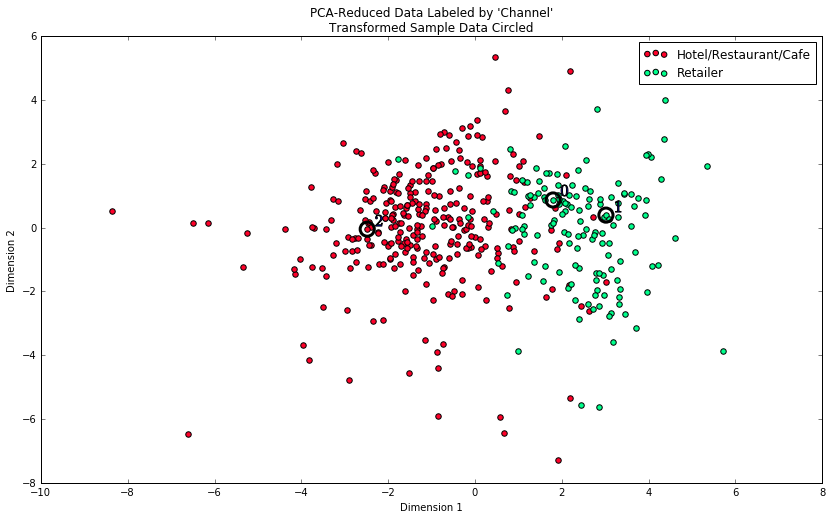

In [42]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** 

The number of clusters I've chosen is exactly the same as here. 

Clustering seems pretty similar as mine 
except from the crossing on central data. 

Since we're using K_Means all datas are purely classified as 'Retailers' or  'Hotels/Restaurants/Cafes'. We could have used the GMM model which would have avoided this problem by enabling soft margin clustering and probability labeling.

Overall, the data seems to be well classified and consistent with previous classification since, except for a few errors, most of the points are given the same label as before. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.